### **Importando as bibliotecas**

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

### **Carregando os dados** 

In [68]:
etanol11 = pd.read_csv('../Data/precos-gasolina-etanol-11.csv', sep=';')
etanol12 = pd.read_csv('../Data/precos-gasolina-etanol-12.csv', sep=';')



In [69]:
#t_et11 = etanol11.head(100)
#t_et12 = etanol12.head(100)



In [70]:
df = pd.concat([etanol11,etanol12], ignore_index=True)
df.drop(['Cep','CNPJ da Revenda','Valor de Compra','Unidade de Medida','Complemento','Numero Rua','Nome da Rua'], inplace=True, axis='columns')
df = df.reindex(columns=['Regiao - Sigla','Estado - Sigla','Municipio','Bairro','Bandeira','Revenda','Valor de Venda','Produto','Data da Coleta'])
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

In [71]:
df

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,2023-11-01
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA ADITIVADA,2023-11-01
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,2023-11-01
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,2023-11-01
4,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.29,GASOLINA ADITIVADA,2023-11-01
...,...,...,...,...,...,...,...,...,...
101991,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,5.79,GASOLINA,2023-12-29
101992,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,3.79,ETANOL,2023-12-29
101993,S,RS,OSORIO,CENTRO,RODOIL,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,5.49,GASOLINA,2023-12-29
101994,S,RS,OSORIO,CENTRO,RODOIL,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,5.59,GASOLINA ADITIVADA,2023-12-29


### Plotando

In [72]:
#df = df.set_index(['Data da Coleta'])
df

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,2023-11-01
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA ADITIVADA,2023-11-01
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,2023-11-01
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,2023-11-01
4,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.29,GASOLINA ADITIVADA,2023-11-01
...,...,...,...,...,...,...,...,...,...
101991,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,5.79,GASOLINA,2023-12-29
101992,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,3.79,ETANOL,2023-12-29
101993,S,RS,OSORIO,CENTRO,RODOIL,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,5.49,GASOLINA,2023-12-29
101994,S,RS,OSORIO,CENTRO,RODOIL,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,5.59,GASOLINA ADITIVADA,2023-12-29


In [73]:
gp1 = df.groupby(['Data da Coleta','Produto'])['Valor de Venda'].mean()
gp1

Data da Coleta  Produto           
2023-11-01      ETANOL                3.879103
                GASOLINA              5.686607
                GASOLINA ADITIVADA    5.862504
2023-11-02      ETANOL                3.835196
                GASOLINA              5.628386
                                        ...   
2023-12-28      GASOLINA              5.682149
                GASOLINA ADITIVADA    5.878672
2023-12-29      ETANOL                3.605207
                GASOLINA              5.578553
                GASOLINA ADITIVADA    5.753567
Name: Valor de Venda, Length: 129, dtype: float64

In [74]:
gp1 = pd.DataFrame(gp1)
gp1

Valor de Venda
Data da Coleta Produto                           
2023-11-01     ETANOL                    3.879103
               GASOLINA                  5.686607
               GASOLINA ADITIVADA        5.862504
2023-11-02     ETANOL                    3.835196
               GASOLINA                  5.628386
...                                           ...
2023-12-28     GASOLINA                  5.682149
               GASOLINA ADITIVADA        5.878672
2023-12-29     ETANOL                    3.605207
               GASOLINA                  5.578553
               GASOLINA ADITIVADA        5.753567

[129 rows x 1 columns]

In [75]:
# o filtro do groupby e transformado em indices por isso tem de reseta-los
gp1 = gp1.reset_index()
gp1

,Data da Coleta,Produto,Valor de Venda
0,2023-11-01,ETANOL,3.879103
1,2023-11-01,GASOLINA,5.686607
2,2023-11-01,GASOLINA ADITIVADA,5.862504
3,2023-11-02,ETANOL,3.835196
4,2023-11-02,GASOLINA,5.628386
...,...,...,...
124,2023-12-28,GASOLINA,5.682149
125,2023-12-28,GASOLINA ADITIVADA,5.878672
126,2023-12-29,ETANOL,3.605207
127,2023-12-29,GASOLINA,5.578553


In [76]:
df_pivot = gp1.pivot_table(index='Produto', columns='Data da Coleta', values='Valor de Venda', aggfunc='mean')
df_pivot

Data da Coleta,2023-11-01,2023-11-02,2023-11-03,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-13,2023-11-14,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29
Produto,,,,,,,,,,,,,,,,,,,,,
ETANOL,3.879103,3.835196,3.974205,3.824562,3.948826,3.825620,3.791846,4.012222,3.821632,3.908505,...,3.725945,3.780901,3.762321,3.731444,3.977273,3.835134,3.702903,3.732087,3.757453,3.605207
GASOLINA,5.686607,5.628386,5.700328,5.641920,5.707864,5.699992,5.670431,5.671392,5.654572,5.736272,...,5.623821,5.653653,5.573469,5.649424,5.965161,5.612367,5.579537,5.616852,5.682149,5.578553
GASOLINA ADITIVADA,5.862504,5.807912,5.881830,5.846512,5.884087,5.891384,5.826552,5.827797,5.854993,5.902261,...,5.826008,5.834274,5.787337,5.833060,5.888667,5.798506,5.779585,5.811489,5.878672,5.753567


In [77]:
dfgp1 = gp1.set_index(['Data da Coleta'])
dfgp1
# o X e o index, os produtos tem que ter colunas

,Produto,Valor de Venda
Data da Coleta,,
2023-11-01,ETANOL,3.879103
2023-11-01,GASOLINA,5.686607
2023-11-01,GASOLINA ADITIVADA,5.862504
2023-11-02,ETANOL,3.835196
2023-11-02,GASOLINA,5.628386
...,...,...
2023-12-28,GASOLINA,5.682149
2023-12-28,GASOLINA ADITIVADA,5.878672
2023-12-29,ETANOL,3.605207


In [78]:
dfgp1.T

Data da Coleta,2023-11-01,2023-11-01,2023-11-01,2023-11-02,2023-11-02,2023-11-02,2023-11-03,2023-11-03,2023-11-03,2023-11-06,...,2023-12-26,2023-12-27,2023-12-27,2023-12-27,2023-12-28,2023-12-28,2023-12-28,2023-12-29,2023-12-29,2023-12-29
Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA,ETANOL,GASOLINA,GASOLINA ADITIVADA,ETANOL,GASOLINA,GASOLINA ADITIVADA,ETANOL,...,GASOLINA ADITIVADA,ETANOL,GASOLINA,GASOLINA ADITIVADA,ETANOL,GASOLINA,GASOLINA ADITIVADA,ETANOL,GASOLINA,GASOLINA ADITIVADA
Valor de Venda,3.879103,5.686607,5.862504,3.835196,5.628386,5.807912,3.974205,5.700328,5.88183,3.824562,...,5.779585,3.732087,5.616852,5.811489,3.757453,5.682149,5.878672,3.605207,5.578553,5.753567


<Axes: xlabel='Data da Coleta'>

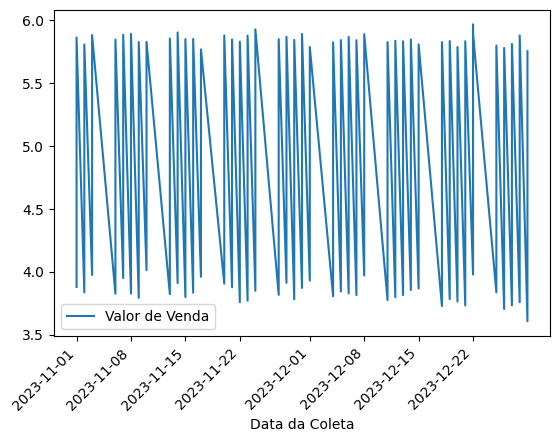

In [79]:
dfgp1.plot(rot=45)

<Axes: xlabel='Data da Coleta'>

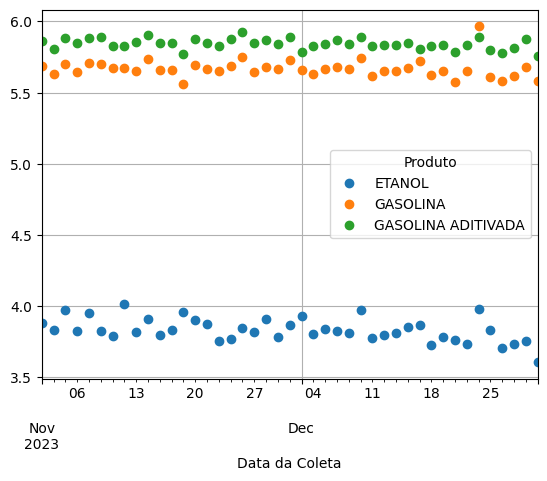

In [85]:
df_pivot.T.plot(marker='o',rot=0, grid = True)